In [1]:
# do imports
import nltk
import numpy as np
import pandas as pd
import preprocessing
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
books_data = preprocessing.load_books_rating_data(50000)
books_data

,score,text
0,4.0,This is only for Julie Strain fans. It's a col...
1,5.0,I don't care much for Dr. Seuss but after read...
2,5.0,"If people become the books they read and if ""t..."
3,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,4.0,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...
49995,1.0,I'd love to read the book but I'm not paying $...
49996,2.0,"I have to admit, I usually do not like histori..."
49997,5.0,"Yay! I have never read this book, but I'm read..."
49998,2.0,I had been wanting to read this book for a lon...


<AxesSubplot: xlabel='score', ylabel='count'>

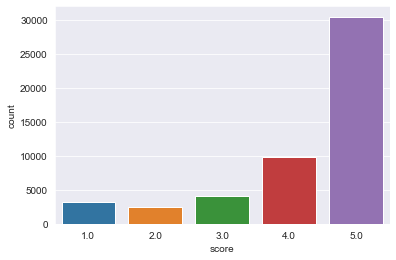

In [4]:
sns.countplot(x="score", data=books_data)

In [6]:
X_balanced, y_balanced = preprocessing.under_sample(np.array(books_data.review).reshape(-1, 1), books_data.score)
X_balanced = [sent[0] for sent in X_balanced]

<AxesSubplot: xlabel='score', ylabel='count'>

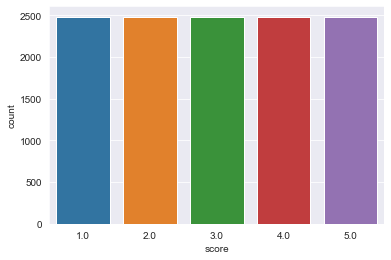

In [7]:
sns.countplot(x="score", data=pd.DataFrame(y_balanced))

In [5]:
# tokenize the review text
x = preprocessing.tokenize(X_balanced)
x.head()

0    [This, is, only, for, Julie, Strain, fans, ., ...
1    [I, do, n't, care, much, for, Dr., Seuss, but,...
2    [If, people, become, the, books, they, read, a...
3    [Theodore, Seuss, Geisel, (, 1904-1991, ), ,, ...
4    [Philip, Nel, -, Dr., Seuss, :, American, Icon...
Name: text, dtype: object

In [9]:
# create our pairs of features and target for every review
words = preprocessing.flatten(X_balanced)
features = preprocessing.get_review_features(X_balanced, words)
features_score_pairs = list(zip(features, y_balanced))

In [11]:
# split data into training and test
train, test = train_test_split(features_score_pairs, train_size=0.8)

In [13]:
# train a naive bayes on the training data and test its accuracy
naive_bayes = nltk.NaiveBayesClassifier.train(train)

In [14]:
accuracy = nltk.classify.accuracy(naive_bayes, test)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 39.15%
